# 07 프로젝트 : 나랑 닮은 연예인을 찾아보자

지금부터는 위에서 배운 내용을 토대로 연예인 사진과 나를 비교해 보는 시간을 갖도록 하겠습니다!

## Step1. 사진 모으기  
비교하려면 사진을 모아야겠죠? 우선 나만 볼 테니 내 사진과 비교해 보고 싶은 연예인 사진을 모아봅시다. 평소에 닮았다고 생각했던 연예인 사진들을 모두 모아보는 것도 좋을 것 같네요.
사진을 하나의 디렉토리 안에 모아 봅시다. 모을 때 사진의 파일명은 가급적 장동건.jpg, 김태희.png와 같이 파일명이 사람 이름이 들어 있도록 하는 것이 좋습니다. (설마 이분들과 닮았다고 생각하시는 것은?? 😅)

1. 내 사진 찍기

내 사진을 2장 이상 포함합시다.  
내 사진들끼리의 얼굴 임베딩 벡터 거리를 구해 봅시다. 닮았음을 확인할 수 있는 좋은 베이스라인이 될 수 있습니다.  
혹시 내 사진들끼리의 거리가 멀게 나온다면 왜 그럴지 생각해 봅시다.  

2. 비교할 연예인 사진 모으기

많이 모을수록 나와 더 닮은 연예인을 찾을 가능성이 높아질 것입니다.
주위의 동료들과 모은 사진을 주고받는 것도 하나의 방법입니다.

In [1]:
import face_recognition
import os
import numpy as np
from PIL import Image

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
dir_path = os.getenv('HOME')+'/aiffel/my_photo'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))


file_list: ['이진호.jpeg', '강동원.jpg', '박휘순.jpg', '윤도현.png', '클린트 이스트우드.jpg', '숀 코네리.jpg', '지코.jpg', '김연우.jpeg', '진.jpg', '이정재.jpeg', '제이콥 배털론.jpg', '잭 블랙.jpeg', '박성호.jpg', '돈스파이크.jpg', '채연.jpg', '무라니시.png', '트와이스미나.jpg', '김희철.jpg', '이효리.jpg', '최양락.jpg', '제이크 질렌할.jpeg', '박진영.jpeg', '제프리 힌턴.jpg', '온앤오프라운.jpg', '고창석.jpeg', '도아.jpeg', '곽도원.jpg', '차명석.jpg', '잭 스페이더.jpeg', '이천수.jpg', '조정석.jpg', '리암 니슨.png', '조이.jpg', '전소미.jpg', '김학범.jpg', '정수빈.jpg', '존 파브르.jpeg', '레드벨벳웬디.jpg', '성시경.jpg', '유리.jpg', '김상호.png', '찬열.jpg', '기성용.jpg', '트와이스정연.jpg', '장동건.jpeg', '산들.jpeg', '아놀드 슈워제네거.jpg', '트와이스쯔위.jpg', '이용진.jpg', '이영하.jpg', '사쿠라.jpg', '잭 갤리퍼내키스.jpg', '김구라.jpg', 'bush.jpeg', '꽈두룹.jpg', '박서준.jpg', 'clinton.jpeg', '류진.jpg', '권현빈.jpg', '김남주.jpeg', '공효진.jpg', '김윤석.jpeg', '아린.jpg', '유해진.jpg', '김C.jpeg', '효정.jpg', '우기.jpg', '앤드류 응.png', '박찬욱.jpeg', '최무성.jpg', '심수창.jpeg', '태양.jpeg', '카이.jpg', '이재용.jpg', '손흥민.jpg', '아이즈원김채원.jpg', 'limjs2.jpg', '저스틴 존슨.jpeg', '한석규.jpg', 'biden.jpg', '차승원.jpg', '슬리피.jpg', '윤아.jp

## Step2. 얼굴 영역 자르기  
임베딩 추출을 위해서는 얼굴 영역을 잘라줘야 합니다.    
위 Step1.에서 찾은 이미지들을 이전에 만들었던   
get_gropped_face(image_file)을 통해서 잘라줍시다!   

자른 이미지는 PIL의 Image.fromarray를 통해서 PIL Image로 변환한 뒤에 저장   
을 해두면 다양한 재미있는 시각화를 시도해 보는 데 도움이 될 것입니다.  

*    힌트  
*    from PIL import Image  
*    face = get_gropped_face(image_path)  
*    pillow_image = Image.fromarray(face)  
*    pillow_image.save(path_to_save)  

In [3]:
shape = 0
cropped_zero = []
def get_gropped_face(image_file):
    
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    
    if len(face_locations) == 0:
        return np.zeros(shape)       
    else:
        #print(face_locations)
        a, b, c, d = face_locations[0]
        cropped_face = image[a:c,d:b,:]        
        
        return cropped_face
    
def get_gropped_and_save_face(image_file1, image_file2):
    
    image1 = face_recognition.load_image_file(image_file1)
    face_locations1 = face_recognition.face_locations(image1)
    
    if len(face_locations1) == 0:
        return np.zeros(shape)       
    else:        
        a, b, c, d = face_locations1[0]
        cropped_face1 = image1[a:c,d:b,:]
        
        img1 = Image.open(image_file1)
#         print(image_file1)
#         print(type(img))
#         print("=============================\n")
#         W,H = img.size
#         print("W, H :",(W,H))
#         print("format :", img.format)
#         print("size : ", img.size)
#         print("img mode : ", img.mode)
        print("a b c d : ",a, b, c, d)
        img1.crop((a,c,d,b))

        # 새로운 이미지 파일명
        cropped_img_path1 = image_file1.replace("my_photo/", "crop_image/")
        cropped_img_path1 = cropped_img_path1.replace(".", "_crop.")
        print(cropped_img_path1)
        img1.crop((a,d,a+c/2, d+b/2)).save(cropped_img_path1)
        
    image2 = face_recognition.load_image_file(image_file2)
    face_locations2 = face_recognition.face_locations(image2)
    
    if len(face_locations2) == 0:
        return np.zeros(shape)       
    else:        
        a, b, c, d = face_locations2[0]
        cropped_face2 = image1[a:c,d:b,:]
        
        img2 = Image.open(image_file2)
        print("a b c d : ",a, b, c, d)
        img2.crop((a,c,d,b))

        # 새로운 이미지 파일명
        cropped_img_path2 = image_file2.replace("my_photo/", "crop_image/")
        cropped_img_path2 = cropped_img_path2.replace(".", "_crop.")
        print(cropped_img_path2)
        img2.crop((a,d,a+c/2, d+b/2)).save(cropped_img_path2)        
        
        image1 = Image.open(cropped_img_path1)
        #image1.show()
        plt.imshow(image1)

        image2 = Image.open(cropped_img_path2)
        #image2.show()
        plt.imshow(image2)
        
        image1 = image1.resize((200, 200))
        image2 = image2.resize((200, 200))
        image1_size = image1.size
        image2_size = image2.size
        
        new_image = Image.new('RGB',(2*image1_size[0], image2_size[1]), (0,0,0))
        new_image.paste(image1,(0,0))
        new_image.paste(image2,(image1_size[0],0))
        dir_crop_path = os.getenv('HOME')+'/aiffel/crop_image/'
        new_image.save( dir_crop_path+"merged_image.jpg","JPEG")
        #new_image.show()
        plt.imshow(new_image)
        
        merge_path = os.getenv("HOME") + "/aiffel/crop_image/merged_image.jpg"
        img = Image.open(merge_path)
        #print(img_path)
       
        return img

a b c d :  171 438 439 171
/home/aiffel-dj56/aiffel/crop_image/b1a4진영_crop.jpg
a b c d :  118 304 304 118
/home/aiffel-dj56/aiffel/crop_image/수호_crop.jpg


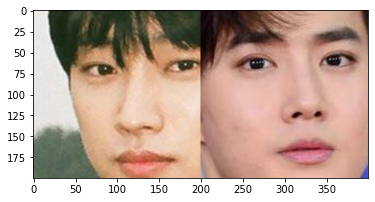

In [4]:
#샘플 이미지 불러와서 보여주고 crop한 이미지 저장해 두기
image_path1 = os.getenv('HOME')+'/aiffel/my_photo/b1a4진영.jpg'
image_path2 = os.getenv('HOME')+'/aiffel/my_photo/수호.jpg'
cropped_face = get_gropped_and_save_face(image_path1, image_path2)
#print(cropped_face)
#plt.imshow(cropped_face)

## Step3. 얼굴 영역의 임베딩 추출하기  
이제 얼굴 영역으로 잘린 이미지들이 여럿 생겼을 텐데요. 그 이미지를 face_recognition 을 사용해서 이미지를 불러오고 임베딩을 추출해 봅시다. 다른 사람의 임베딩은 구분할 수 있게 따로 저장해 주세요. 이전에 만들었던 다음 함수들을 활용하면 손쉽게 수행 가능합니다.

def get_face_embedding(face) : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding_dict(dir_path) : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수

In [5]:
# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [6]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        #이미지 경로
        img_path = os.path.join(dir_path, file)
        #이미지에서 얼굴 자르기
        face = get_gropped_face(img_path)
        if len(face) == 0: continue
        #맨 마지막 실행한 이미지만 프린트되어져 보인다.
        #plt.imshow(face)
        #자른 이미지를 임베딩 벡터 만들기
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            #임베딩 딕셔너리에 [키=파일이름] : [값=임베딩 벡터]
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
            
    return embedding_dict

In [7]:
embedding_dict = get_face_embedding_dict(dir_path)
#임베딩 딕셔너리에서 limjs파일의 임베딩 벡터 보기
embedding_dict['limjs']

array([-0.1383689 ,  0.05765133,  0.04311059, -0.09100817, -0.05163747,
       -0.0646321 , -0.06525731, -0.07296143,  0.20249888, -0.1071986 ,
        0.1432652 , -0.11440071, -0.19451155,  0.00054614, -0.08003286,
        0.22313775, -0.12411276, -0.13009563, -0.09717204,  0.01151001,
        0.0810851 ,  0.02130347, -0.02635051,  0.04211945, -0.10250068,
       -0.33036473, -0.11797719, -0.06436529, -0.01962719, -0.04948614,
       -0.02294108,  0.06310619, -0.1397579 , -0.02595976,  0.03665613,
        0.06791259,  0.02980777, -0.12486824,  0.17473748, -0.03234438,
       -0.29903772,  0.03699676,  0.07336276,  0.2158376 ,  0.17063509,
       -0.05371611,  0.03173231, -0.15222575,  0.15195835, -0.12441462,
       -0.04236669,  0.14203835,  0.06399708,  0.08727673,  0.0218334 ,
       -0.09812681,  0.09752499,  0.10987344, -0.15410136, -0.04163292,
        0.09766418, -0.04068135, -0.04972607, -0.05045666,  0.18098135,
        0.07709416, -0.12905481, -0.23688562,  0.1684158 , -0.10

In [8]:
#사진 위치 넣고 key=이름 : value : 임베딩 벡터의 딕셔너리 만들기
dir_path = os.getenv('HOME')+'/aiffel/my_photo'
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['limjs3']

array([-0.10489871,  0.05445957,  0.01494298, -0.13086313, -0.03791298,
       -0.02535544, -0.05317841, -0.04761412,  0.22669674, -0.12935825,
        0.15196735, -0.09412218, -0.20349911, -0.0108742 , -0.09300483,
        0.24039952, -0.13597058, -0.1367934 , -0.0725909 ,  0.02938662,
        0.1141004 ,  0.03549778, -0.00538412,  0.05857698, -0.10583447,
       -0.32489023, -0.12752491, -0.04190189, -0.04496627, -0.06224417,
        0.01165242,  0.02983951, -0.16295806, -0.02319225,  0.03831818,
        0.08350043,  0.02175487, -0.12649493,  0.18609813,  0.02446245,
       -0.30730486,  0.04554097,  0.07580765,  0.22692157,  0.13238217,
        0.0019176 ,  0.0121057 , -0.18159239,  0.14508663, -0.14974469,
       -0.00655579,  0.12109199,  0.04276631,  0.05003532,  0.01577672,
       -0.09538971,  0.09811416,  0.13355093, -0.17952912, -0.02041864,
        0.07629898, -0.02280681, -0.05760407, -0.06947255,  0.18447334,
        0.09467264, -0.13939138, -0.24271974,  0.16930223, -0.11

In [9]:
#임베딩 벡터끼리 거리 계산하기
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('limjs2', 'limjs3')
#내 사진끼리 거리 비교

0.313614026531175

In [10]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, 
#name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('limjs')   

In [11]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('limjs',
  array([-0.1383689 ,  0.05765133,  0.04311059, -0.09100817, -0.05163747,
         -0.0646321 , -0.06525731, -0.07296143,  0.20249888, -0.1071986 ,
          0.1432652 , -0.11440071, -0.19451155,  0.00054614, -0.08003286,
          0.22313775, -0.12411276, -0.13009563, -0.09717204,  0.01151001,
          0.0810851 ,  0.02130347, -0.02635051,  0.04211945, -0.10250068,
         -0.33036473, -0.11797719, -0.06436529, -0.01962719, -0.04948614,
         -0.02294108,  0.06310619, -0.1397579 , -0.02595976,  0.03665613,
          0.06791259,  0.02980777, -0.12486824,  0.17473748, -0.03234438,
         -0.29903772,  0.03699676,  0.07336276,  0.2158376 ,  0.17063509,
         -0.05371611,  0.03173231, -0.15222575,  0.15195835, -0.12441462,
         -0.04236669,  0.14203835,  0.06399708,  0.08727673,  0.0218334 ,
         -0.09812681,  0.09752499,  0.10987344, -0.15410136, -0.04163292,
          0.09766418, -0.04068135, -0.04972607, -0.05045666,  0.18098135,
          0.07709416, -0.12

## Step4. 모은 연예인들과 비교하기  
모은 연예인 사진들과 자신의 얼굴 사진에서 추출한 임베딩 벡터들 간의 거리를 비교해 보고 가장 작은 연예인이 누구인지 찾아봅시다!

이전 스텝에서 만들었던 get_nearest_face(name, top=5) 함수들을 응용하면 손쉽게 수행 가능합니다.

In [12]:
def get_nearest_face(name, top=8):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
            image_file = os.path.join(dir_path, sorted_faces[i][0]+'.jpg')
            #print(image_file)
            face = get_gropped_face(image_file)
            if len(face) == 0: continue
            pillow_image = Image.fromarray(face)  
            pillow_re_image = pillow_image.resize((200, 200))
       
            dir_crop_path = os.getenv('HOME')+'/aiffel/crop_image/'
            crop_face_path = dir_crop_path + sorted_faces[i][0] + "_crop.jpg"
            #print(crop_face_path)
            
            #Crop한 이미지들을 /crop_image 디렉토리 안에 이름을 바꾸어 저장
            pillow_re_image.save(crop_face_path)  
            plt.subplot(2,4,i)
            plt.imshow(face)             

## Step5. 다양한 재미있는 시각화 시도해 보기  
비단 닮은 꼴 연예인을 찾기만 할 것이 아니라, 그들의 얼굴 사진을 활용하여 재미있는 시각화를 시도해 보시기 바랍니다.
tkinter나 flask를 활용해서 닮은꼴을 찾을 이미지를 업로드한 후 그 이미지와 닮은 얼굴을 찾는 형태로 구현해 보는 것도 재미있을 것입니다.
여러분들의 재치가 넘치는 작품들을 기대합니다. 😎

순위 1 : 이름(limjs3), 거리(0.2562992453465401)
순위 2 : 이름(limjs2), 거리(0.29859187577470486)
순위 3 : 이름(화사), 거리(0.4363576881259596)
순위 4 : 이름(승희), 거리(0.4730094016432591)
순위 5 : 이름(비니), 거리(0.4840043107077582)
순위 6 : 이름(우기), 거리(0.48584257724064817)
순위 7 : 이름(사쿠라), 거리(0.48592257166235053)
순위 8 : 이름(김고은), 거리(0.4864567751368161)


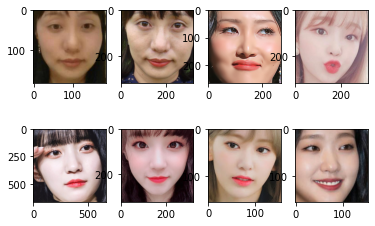

In [13]:
# limjs와 가장 닮은 사람은 누굴까요?
get_nearest_face('limjs')         #가장 거리가 가까운 이미지의 벡터값끼리 비교(top8)하고 자른 이미지 저장해 둠

In [14]:
#두 이미지를 겹쳐서 그리는 함수 
def blended_image(img_path1, img_path2):
    
    im1 = Image.open(dir_crop_path1)
    im2 = Image.open(dir_crop_path2)
    blended = Image.blend(im1, im2, alpha=0.5)
    dir_crop_path = os.getenv('HOME')+'/aiffel/crop_image/'
    blended.save(dir_crop_path+"blended.jpg")    
    
    plt.subplot(1,3,1)
    plt.imshow(im1)
    plt.subplot(1,3,2)
    plt.imshow(im2)
    plt.subplot(1,3,3)
    plt.imshow(blended)    

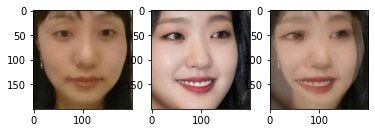

In [15]:
#닮은꼴 연예인과 얼굴 겹쳐서 그려보기 
dir_crop_path1 = os.getenv('HOME')+'/aiffel/crop_image/limjs3_crop.jpg'
dir_crop_path2 = os.getenv('HOME')+'/aiffel/crop_image/김고은_crop.jpg'
#두 이미지 겹쳐 그리기 
blended_image(dir_crop_path1, dir_crop_path2)

순위 1 : 이름(b1a4진영), 거리(0.3585801590697091)
순위 2 : 이름(권현빈), 거리(0.3687922005475508)
순위 3 : 이름(조정석), 거리(0.4005494190042566)
순위 4 : 이름(하현우), 거리(0.4033633633262119)
순위 5 : 이름(꽈두룹), 거리(0.4034990274315608)
순위 6 : 이름(박서준), 거리(0.4036755750608235)
순위 7 : 이름(레인보우재경), 거리(0.41324554980843076)
순위 8 : 이름(윤균상), 거리(0.41829495571858155)


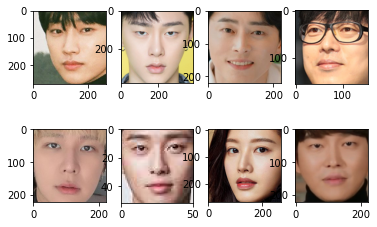

In [16]:
# 남자 연예인과 가장 닮은 사람이 누구일지 시도
get_nearest_face('김희철')        #가장 거리가 가까운 이미지의 벡터값끼리 비교(top8)하고 자른 이미지 저장해 둠

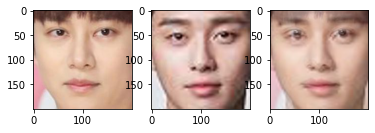

In [17]:
#닮은꼴 연예인과 얼굴 겹쳐서 그려보기 
dir_crop_path1 = os.getenv('HOME')+'/aiffel/crop_image/김희철_crop.jpg'
dir_crop_path2 = os.getenv('HOME')+'/aiffel/crop_image/박서준_crop.jpg'

#두 이미지 겹쳐 그리기 
blended_image(dir_crop_path1, dir_crop_path2)

## 루브릭  

아래의 기준을 바탕으로 프로젝트를 평가합니다.  

평가문항/상세기준  
1. 얼굴임베딩 벡터를 활용해 가장 닮은 연예인 Best 5를 구할 수 있다.  
닮은꼴 순위, 이름, 임베딩 거리를 포함한 Top-5 리스트가 정렬되어 출력되었다.  

2. 충분한 수의 이미지에 대한 시도를 통해 매우 닮은꼴의 연예인을 찾아냈다.  
다양한 탐색을 통해 본인과 임베딩 거리 0.5 이내로 닮은 연예인을 찾아냈다.  

3. 다양하고 재미있는 결과 시각화를 시도하였다.  
matplotlib 등 다양한 시각화 도구를 하나 이상 이용해 재미있는 결과 시각화를 구현하였다.  

## ◈ 결론 및 고찰

자신의 사진끼리 이미지 벡터를 구하여 비교하여 얻은 결과는 **0.2 ~ 0.3점대** 로 결과를 얻었다. 이는 셀카의 성격상 얼굴 각도가 거의 비슷하기 때문에 얼굴 비율이 거의 같기 때문이지 않을까 예상해 본다.  
연예인 들의 사진들과 거리 벡터를 구하여 상위 8명까지 구하여 비교해 보는 과정을 구현해 보았다.   
이때, 자신의 사진도 3장 정도 넣어서 얼마나 유사성을 잘 찾는지 시도해 보았고, 역시 자신의 사진부터 유사성이 높은 결과를 얻는 경향을 확인할 수 있었다.  
또한, 남자 연예인의 경우 유사성이 높은 순서를 구해 보았는데, 이 경우, 여성 연예인의 경우 유사성이 높은 결과가 나왔는데, 이는 얼굴의 눈, 코, 입의 비율이 남성 연예인과 유사도가 높아서 일 경우로 예상해 보았다.  


#### ♠ 처음 프로젝트를 수행하면서 거리 벡터는 구하였는데, 에러가 계속 발생하는 문제가 있었는데, 이미지의 확장자가 jpg와 jpeg로 2가지로 되어 있어서 Crop한 이미지를 불러오도록 할 때, 다른 확장자 명으로 인해서 불러오기가 되지 않았던 문제였다. 또한  자른 이미지를 저장하여 서로 비교하는 이미지와 붙여서 바로 연관성을 확인해 보려고 코드를 수정해 보았다.

#### blended_image함수를 만들어서 유사성을 보이는 2개의 이미지를 겹쳐서 그리도록 구현하여 이미지간에 유사도를 시각적으로 확인할 수 있도록 하였다. 
